In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [38]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [39]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_images, val_images = train_images[5000:],train_images[:5000]
train_labels, val_labels = train_labels[5000:],train_labels[:5000]
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255


In [40]:
# using regulatizers to prevent overfitting

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),kernel_regularizer=regularizers.l2(0.01)), #using high kernel size 
    layers.Conv2D(64, (2, 2)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(.3),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.ReLU(), #activation after the normalization improve convergence
    
    layers.Conv2D(128, (2, 2)),
    layers.MaxPooling2D((2,2)),
    layers.GlobalAveragePooling2D(), #more effective than flatten 
    
    layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(.4),
    layers.Dense(10, activation='softmax')
])


In [41]:

#usage of callbacks may help in optimised use of system resources and stop the trainign 

early_stopping = EarlyStopping(patience=3,         # Wait for 3 epochs without improvement
                               restore_best_weights=True)  # Restore the model with the best weights

callbacks = [early_stopping]


In [42]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy',]) 
history = model.fit(train_images, train_labels, epochs = 7,
                    validation_data=(val_images, val_labels),
                    batch_size=30, callbacks=callbacks) #use batch size according to the ram avilable in the system
                                                        #under few cases the batch size plays a significance role in capturing loss
                                                        #less batch size means analysing loss well


Epoch 1/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.7636 - loss: 1.1064 - val_accuracy: 0.9702 - val_loss: 0.1606
Epoch 2/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9656 - loss: 0.1774 - val_accuracy: 0.9828 - val_loss: 0.1145
Epoch 3/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9715 - loss: 0.1486 - val_accuracy: 0.9820 - val_loss: 0.1023
Epoch 4/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.9760 - loss: 0.1273 - val_accuracy: 0.9826 - val_loss: 0.1049
Epoch 5/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 72s 27ms/step - accuracy: 0.9801 - loss: 0.1129 - val_accuracy: 0.9838 - val_loss: 0.0922
Epoch 6/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9811 - loss: 0.1069 - val_accuracy: 0.9842 - val_loss: 0.0960
Epoch 7/7
1834/1834 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9815 - loss: 0.1038 - val_accuracy: 0.9818 - val_loss: 0.1065


In [43]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9815 - loss: 0.1044
Test accuracy: 0.9846000075340271


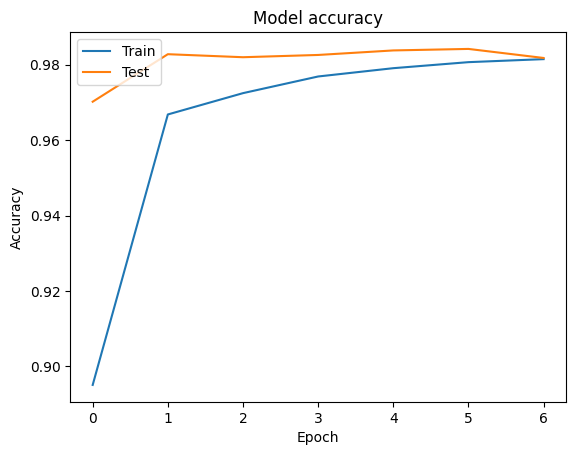

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


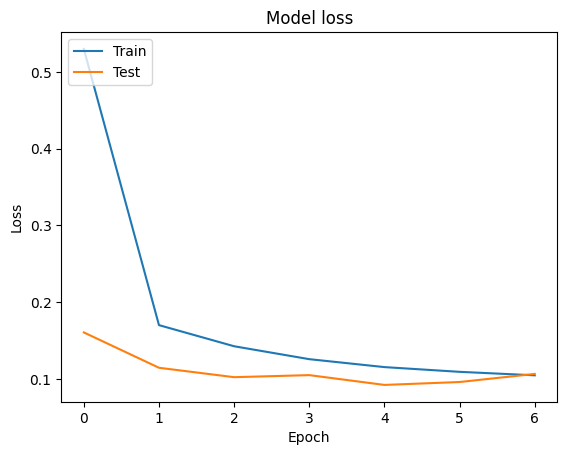

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = 'upper left')
plt.show()
